In [1]:
import os
os.chdir("D:\PulpitE\FPL_ML")

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# loading dataset
df = pd.read_csv('data/previous/FPL_logs.csv')

In [4]:
features = ['Was_home', 'Rating_difference', 'Avg_FPL_points', 'xP_4', "xG_team_30", "xGA_team_30", "xG_opp_30", "xGA_opp_30", "xG_team", "xGA_team"]
to_predict = ['FPL_points', 'xP']
corr_columns = to_predict + features

In [5]:
def add_rolling_features(df, features_to_roll):
    
    for r in rolling_gameweeks:
        form_means = df.groupby(["Name"])[features_to_roll].rolling(r, min_periods=1).mean().groupby(["Name"]).shift(1).reset_index()
        # print(form_means[form_means["Name"] == "Erling-Haaland"])
        form_means = form_means.fillna(method='bfill') # slightly incorrect, better to drop Nan
        form_means.columns = [f'{col}{"_"}{r}' for col in form_means.columns]
        df = pd.concat([df.reset_index(), form_means], axis=1)
        # df = df.merge(form_means, left_index=True, right_index=True)
        df = df.drop([col for col in df.columns if col.startswith('level')], axis=1)
        
    return df.reset_index()

In [6]:
rolling_gameweeks = [4]

In [7]:
df["Rating_difference"] = df["Team_rating"] / df["Opp_rating"]

In [8]:
df = add_rolling_features(df, "xP")

In [9]:
df = df[(df["FPL_points"] > 2) & (df["FPL_pos"] != "GK") & (df["Min"] > 60)]

In [10]:
df = df[corr_columns]

In [11]:
# calculate the correlation matrix
corr = df.corr()

<AxesSubplot:>

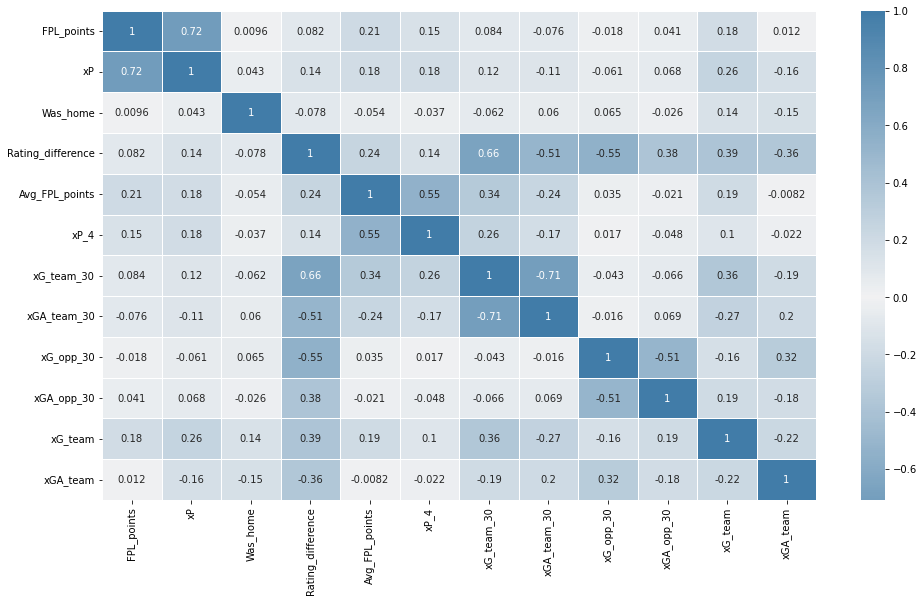

In [12]:
# plot the heatmap
fig = plt.gcf()
fig.set_size_inches(16, 9)
cmap = sns.diverging_palette(240,240, as_cmap=True)
sns.heatmap(corr, center=0, linewidth=0.5, cmap=cmap, annot=True)